# Project Name :- Loan Approval Prediction

## Aim :- To analyze & predict the outcome of the loan approval process for individuals. 

In [1]:
# Import Librarys
import numpy as np              
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

In [2]:
# Import data set
df = pd.read_csv(r"Copy of loan1.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
# get information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Preprocessing

In [7]:
df.Gender.value_counts()
df.Married.value_counts()
df.Dependents.value_counts()
df.Self_Employed.value_counts()
df.LoanAmount.value_counts()
df.Loan_Amount_Term.value_counts()
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [8]:
# Fill null values 
# Categorical with mode()
# Numerical with mean()

df.Gender = df.Gender.fillna('Male')
df.Married  = df.Married .fillna('Yes')
df.Dependents = df.Dependents.fillna(0)
df.Self_Employed = df.Self_Employed.fillna('No')
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())
df.Credit_History  = df.Credit_History.fillna(0)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Drop Loan_Id Because this is unwanted data
df = df.drop(['Loan_ID'],axis=1)

In [11]:
# Replace 3+ into 3
df.Dependents=df.Dependents.replace({'3+':3})

In [12]:
# Change data type object to int
df['Dependents'] = df['Dependents'].astype(int)

In [13]:
# New Feature Selection
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['LoanIncomeRatio'] = df['LoanAmount'] / df['TotalIncome']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [14]:
column_order = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome', 'LoanIncomeRatio', 'EMI','Loan_Status']

In [15]:
df = df[column_order]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  TotalIncome        614 non-null    float64
 12  LoanIncomeRatio    614 non-null    float64
 13  EMI                614 non-null    float64
 14  Loan_Status        614 non-null    object 
dtypes: float64(7), int32(1), int64(1), object(6)
memory usage: 69.7+ KB


In [17]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Data Exploration

number of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

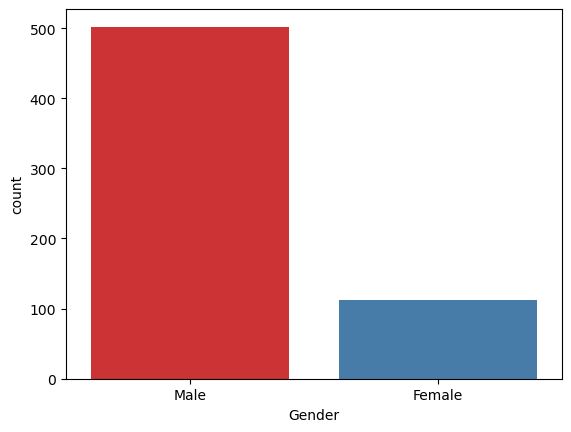

In [18]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df,palette='Set1')

number of people who take loan as group by marital status:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

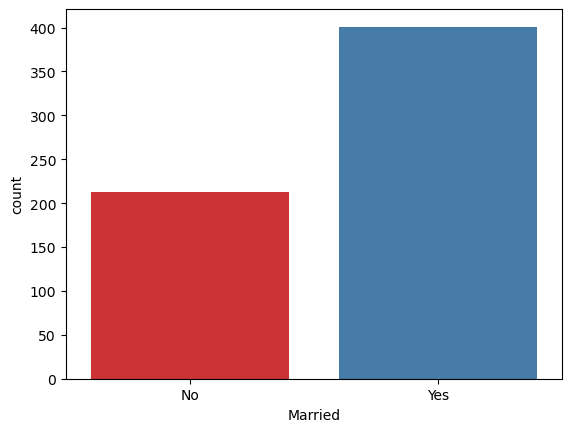

In [19]:
print("number of people who take loan as group by marital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df,palette='Set1')

number of people who take loan as group by dependents :
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

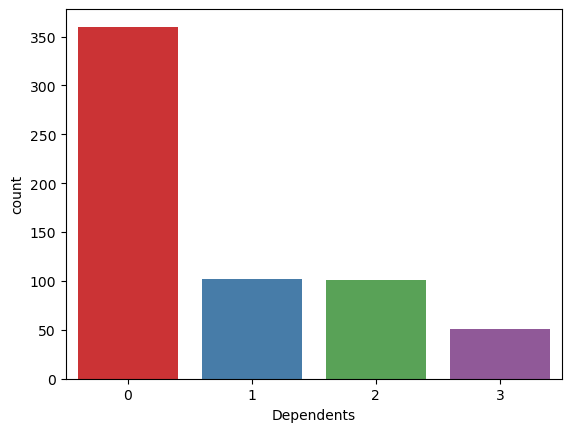

In [20]:
print("number of people who take loan as group by dependents :")
print(df['Dependents'].value_counts())
sns.countplot(x= 'Dependents', data=df,palette='Set1')

number of people who take loan as group by Self Employed :
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

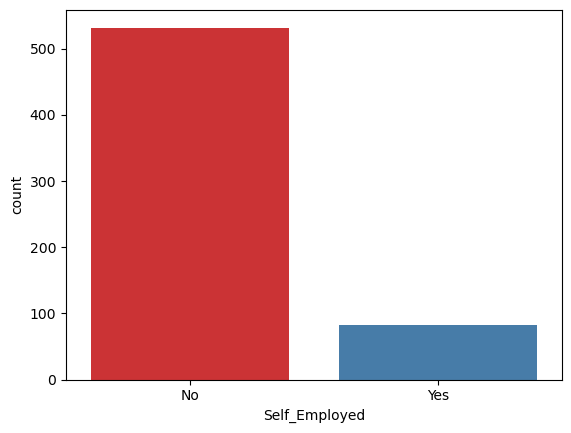

In [21]:
print("number of people who take loan as group by Self Employed :")
print(df['Self_Employed'].value_counts())
sns.countplot(x= 'Self_Employed', data=df,palette='Set1')

number of people who take loan as group by Loan Amount :
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

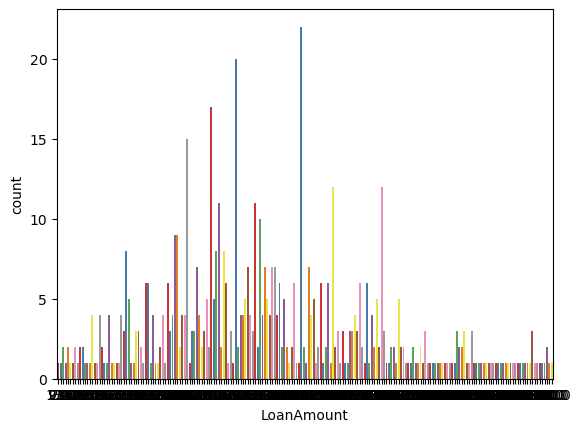

In [22]:
print("number of people who take loan as group by Loan Amount :")
print(df['LoanAmount'].value_counts())
sns.countplot(x= 'LoanAmount', data=df,palette='Set1')

number of people who take loan as group by Credit History:
Credit_History
1.0    475
0.0    139
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

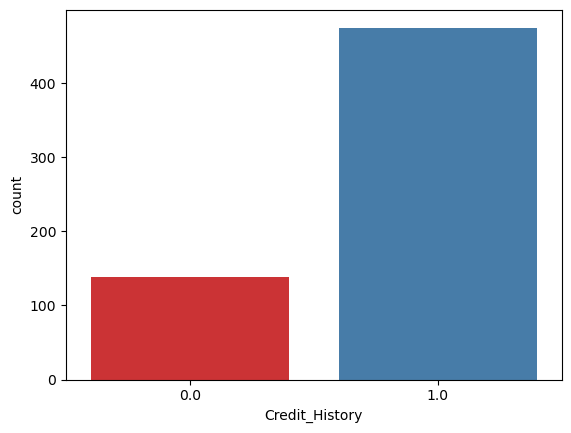

In [23]:
print("number of people who take loan as group by Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x= 'Credit_History', data=df,palette='Set1')

#### Convert object data into numerical

In [24]:
from sklearn.preprocessing import LabelEncoder 

In [25]:
lb = LabelEncoder()

In [26]:
df[df.select_dtypes(include=["object"]).columns]=df[df.select_dtypes(include=["object"]).columns].apply(lb.fit_transform)

#### Sampling (Split data into train & test)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_train,df_test = train_test_split(df,test_size= .2)

In [29]:
#Over Sampling
df1 = df_train[df_train.Loan_Status==0]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanIncomeRatio,EMI,Loan_Status
519,0,0,0,1,0,3400,0.0,95.000000,360.0,1.0,0,3400.0,0.027941,0.263889,0
280,1,0,1,1,1,4053,2426.0,158.000000,360.0,0.0,2,6479.0,0.024386,0.438889,0
152,1,0,0,0,0,9166,0.0,244.000000,360.0,1.0,2,9166.0,0.026620,0.677778,0
499,1,0,0,0,0,6283,4416.0,209.000000,360.0,0.0,0,10699.0,0.019535,0.580556,0
576,1,1,0,0,0,3087,2210.0,136.000000,360.0,0.0,1,5297.0,0.025675,0.377778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,0,0,0,0,2237,0.0,63.000000,480.0,0.0,1,2237.0,0.028163,0.131250,0
284,1,1,0,0,0,20667,0.0,146.412162,360.0,1.0,0,20667.0,0.007084,0.406700,0
166,0,1,0,0,0,4583,0.0,112.000000,360.0,1.0,0,4583.0,0.024438,0.311111,0
251,0,0,2,0,0,3427,0.0,138.000000,360.0,1.0,2,3427.0,0.040268,0.383333,0


In [30]:
df_train = pd.concat([df_train,df1])

In [31]:
df_train_x = df_train.iloc[:, 0:-1]
df_train_y = df_train.iloc[:,-1]

In [32]:
df_train.Loan_Status.value_counts()

Loan_Status
1    331
0    320
Name: count, dtype: int64

In [33]:
df_test_x = df_test.iloc[:,0:-1]
df_test_y = df_test.iloc[:,-1]

### Model Evaluation

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression 

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(df_train_x,df_train_y)

LogisticRegression()

In [37]:
pred = lr.predict(df_test_x)
pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
tab = confusion_matrix(df_test_y,pred)
tab

array([[14, 18],
       [17, 74]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(df_test_y,pred)

0.7154471544715447

In [42]:
from sklearn.metrics import precision_score

In [43]:
precision_score(df_test_y,pred)

0.8043478260869565

In [44]:
from sklearn.metrics import recall_score

In [45]:
recall_score(df_test_y,pred)

0.8131868131868132

In [46]:
from sklearn.metrics import f1_score
f1_score(df_test_y,pred)

0.8087431693989071

In [47]:
pred_proba = lr.predict_proba(df_test_x)
pred_proba

array([[0.35846349, 0.64153651],
       [0.7922639 , 0.2077361 ],
       [0.88373943, 0.11626057],
       [0.32875616, 0.67124384],
       [0.30754149, 0.69245851],
       [0.39357739, 0.60642261],
       [0.83812134, 0.16187866],
       [0.42174435, 0.57825565],
       [0.39320965, 0.60679035],
       [0.2971645 , 0.7028355 ],
       [0.31314218, 0.68685782],
       [0.31439274, 0.68560726],
       [0.39584964, 0.60415036],
       [0.31969102, 0.68030898],
       [0.32831593, 0.67168407],
       [0.3650146 , 0.6349854 ],
       [0.87090202, 0.12909798],
       [0.19076516, 0.80923484],
       [0.26229803, 0.73770197],
       [0.21226589, 0.78773411],
       [0.46441624, 0.53558376],
       [0.80170184, 0.19829816],
       [0.42995259, 0.57004741],
       [0.37833244, 0.62166756],
       [0.73481657, 0.26518343],
       [0.413199  , 0.586801  ],
       [0.48990212, 0.51009788],
       [0.85070069, 0.14929931],
       [0.39361513, 0.60638487],
       [0.28930496, 0.71069504],
       [0.

In [48]:
pred_proba[:,1]

array([0.64153651, 0.2077361 , 0.11626057, 0.67124384, 0.69245851,
       0.60642261, 0.16187866, 0.57825565, 0.60679035, 0.7028355 ,
       0.68685782, 0.68560726, 0.60415036, 0.68030898, 0.67168407,
       0.6349854 , 0.12909798, 0.80923484, 0.73770197, 0.78773411,
       0.53558376, 0.19829816, 0.57004741, 0.62166756, 0.26518343,
       0.586801  , 0.51009788, 0.14929931, 0.60638487, 0.71069504,
       0.63778681, 0.82825595, 0.72776612, 0.18717347, 0.72252215,
       0.24472792, 0.62977754, 0.70044351, 0.23284684, 0.57831177,
       0.19389588, 0.62554483, 0.19013833, 0.37151691, 0.69688581,
       0.70365041, 0.20783193, 0.70788579, 0.72845802, 0.20215513,
       0.85196974, 0.5233997 , 0.66264488, 0.70362469, 0.6443902 ,
       0.83594313, 0.69915782, 0.84794078, 0.52555563, 0.82459848,
       0.73176414, 0.57551179, 0.16683283, 0.23621812, 0.70677431,
       0.17702076, 0.75365914, 0.13441601, 0.18654511, 0.17725596,
       0.70663715, 0.6624497 , 0.63090164, 0.75323038, 0.67660

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [50]:
 roc_auc_score(df_test_y,pred)

0.6253434065934066

In [51]:
fpr,tpr,ther = roc_curve(df_test_y,pred_proba[:,1])

In [52]:
import matplotlib.pyplot as plt

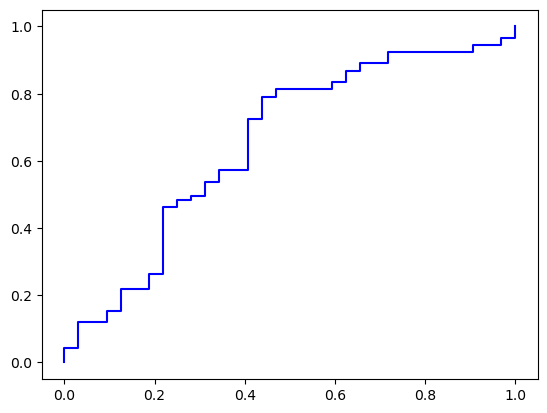

In [53]:
plt.plot(fpr,tpr,color='b')

#### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier()

In [56]:
rf.fit(df_train_x,df_train_y)

RandomForestClassifier()

In [57]:
pred = rf.predict(df_test_x)
pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [58]:
cm = confusion_matrix(df_test_y,pred)
cm

array([[17, 15],
       [22, 69]], dtype=int64)

In [59]:
accuracy_score(df_test_y,pred)

0.6991869918699187

#### Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
nb = MultinomialNB()

In [62]:
nb.fit(df_train_x,df_train_y)

MultinomialNB()

In [63]:
pred = nb.predict(df_test_x)
pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [64]:
cm = confusion_matrix(df_test_y,pred)
cm

array([[17, 15],
       [43, 48]], dtype=int64)

In [65]:
accuracy_score(df_test_y,pred)

0.5284552845528455

#### K- nearest Neighbour

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [69]:
pred = knn.predict(df_test_x)
pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [70]:
cm = confusion_matrix(df_test_y,pred)
cm

array([[ 9, 23],
       [31, 60]], dtype=int64)

In [71]:
accuracy_score(df_test_y,pred)

0.5609756097560976

### Conclusion :- 

### Good fit model is Logistic Regression.